# Churn_Modelling - Classification

## 1) Library Import

In [47]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

import pickle


## 2) Exploratory Analysis

### 2.1) Basic Information

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.shape

(10000, 14)

In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### 2.2) Distribution

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


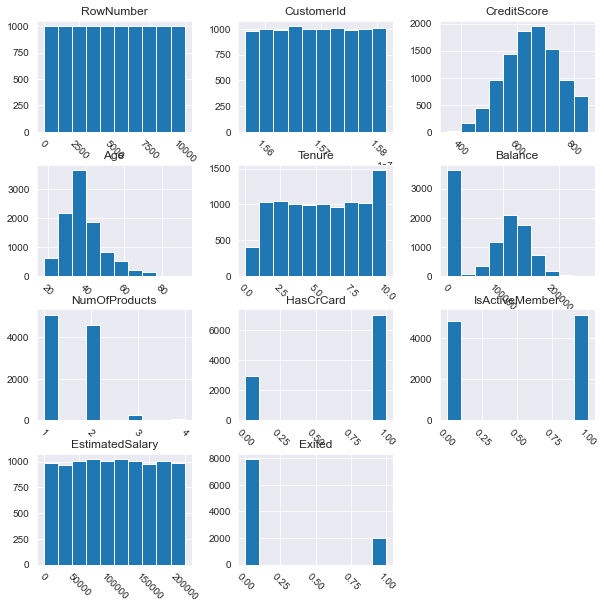

In [10]:
df.hist(figsize=(10,10), xrot=-45)
plt.show()

In [12]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


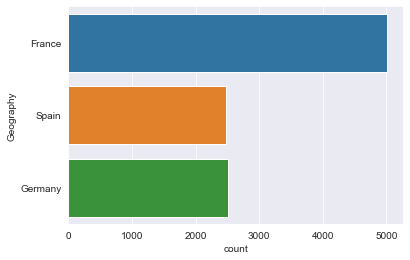

In [24]:
sns.countplot(y='Geography', data=df)
plt.show()

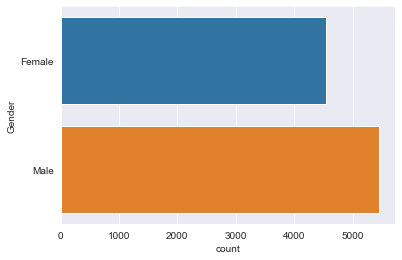

In [25]:
sns.countplot(y='Gender', data=df)
plt.show()

### 2.3) Segmentation

In [41]:
df['Exited_cat'] = df.Exited.replace({1:'Y', 0:'N'})

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Y
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,N
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Y
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,N
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,N


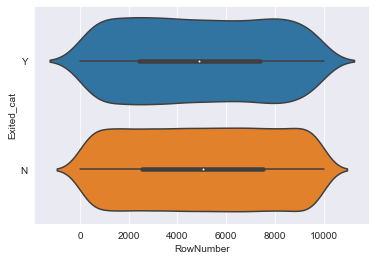

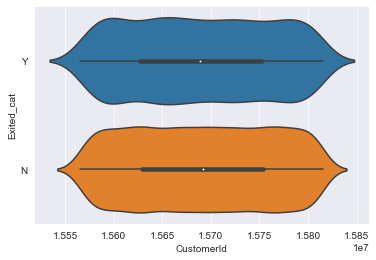

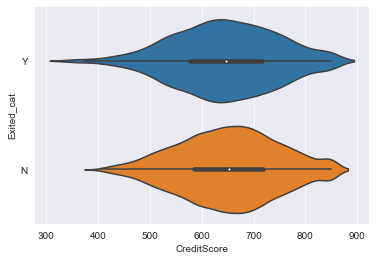

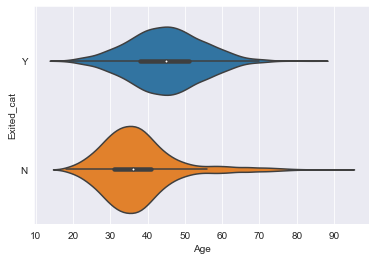

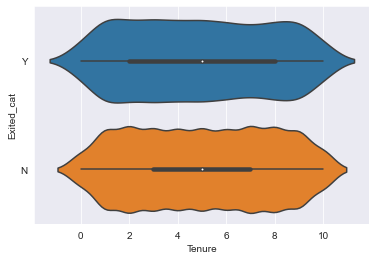

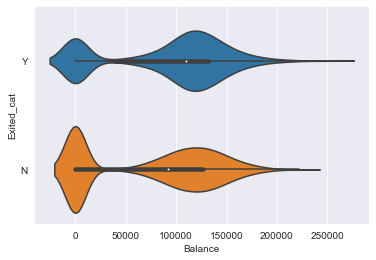

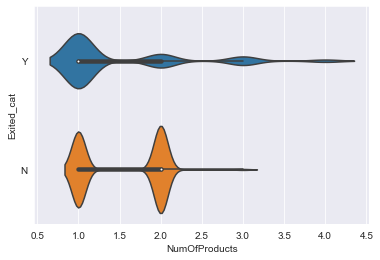

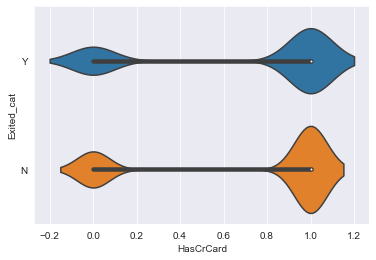

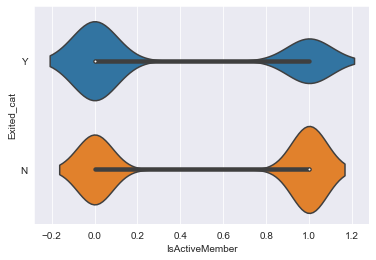

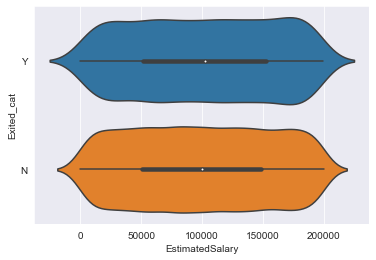

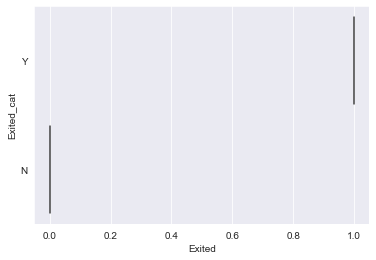

In [44]:
for col in df.dtypes[df.dtypes != 'object'].index:
    sns.violinplot(y='Exited_cat', x=col, data=df)
    plt.show()

In [33]:
df.dtypes[df.dtypes != 'object']

RowNumber            int64
CustomerId           int64
CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

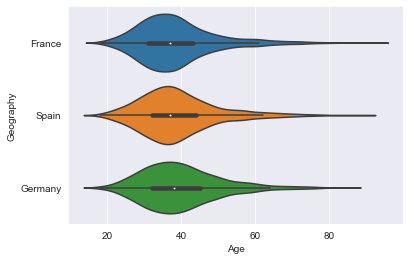

### 2.4) Correlation

In [45]:
corr = df.corr()
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


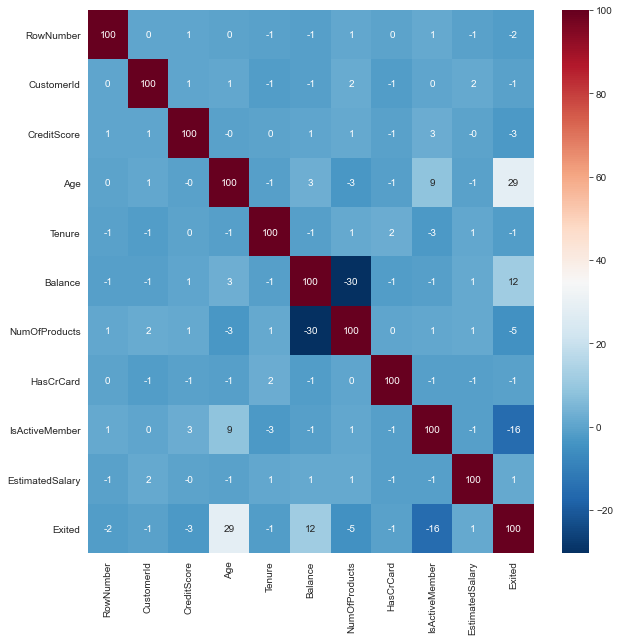

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.heatmap(corr*100, fmt='.0f', cmap='RdBu_r', annot=True)
plt.show()

In [67]:
df.select_dtypes(include=['object', 'int64']).isnull().sum()

RowNumber         0
CustomerId        0
Surname           0
CreditScore       0
Geography         0
Gender            0
Age               0
Tenure            0
NumOfProducts     0
HasCrCard         0
IsActiveMember    0
Exited            0
Exited_cat        0
dtype: int64

In [68]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Exited_cat          object
dtype: object

## 3) Data Cleaning and Feature Engineering

In [69]:
df.shape

(10000, 15)

In [70]:
df = df.drop_duplicates()

In [71]:
df.shape

(10000, 15)

In [72]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Exited_cat          object
dtype: object

In [75]:
df.select_dtypes(exclude=['int32']).isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Exited_cat         0
dtype: int64

In [76]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Y
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,N
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Y
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,N
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,N


In [77]:
df = df.drop('RowNumber', axis=1)

In [78]:
df = df.drop('CustomerId', axis=1)

In [79]:
df = df.drop('Surname', axis=1)

In [80]:
df = df.drop('Exited_cat', axis=1)

In [81]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
abt = pd.get_dummies(columns=['Geography', 'Gender'], data=df)

In [87]:
abt.to_csv('analytical_base_table.csv', index=None)

## 4) Model Selection

In [3]:
abt_df = pd.read_csv('analytical_base_table.csv')
abt_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [4]:
X = abt_df.drop('Exited', axis=1)
y = abt_df.Exited

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=abt_df.Exited, random_state=1234)

In [15]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

8000 8000 2000 2000


In [16]:
X_train.shape

(8000, 13)

In [17]:
y_train.shape

(8000,)

In [19]:
l1 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear', random_state=123))
l2 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123))
rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123))
gb = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
pipelines = {'l1':l1, 'l2':l2, 'rf':rf, 'gb':gb}

In [20]:
l1_hyperparameters = {'logisticregression__C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
l2_hyperparameters = {'logisticregression__C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto','sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1,3,5,10]
} 
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1,3,5]
} 
hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters, 
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

In [21]:
fitted_model = {}
for name, pipeline in pipelines.items():
    print(f'Fitting {name} model.. ')
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    model.fit(X_train, y_train)
    
    fitted_model[name] = model
    
    print(f'Fitting {name} model successfully.. ')
    
    

Fitting l1 model.. 
Fitting l1 model successfully.. 
Fitting l2 model.. 
Fitting l2 model successfully.. 
Fitting rf model.. 
Fitting rf model successfully.. 
Fitting gb model.. 
Fitting gb model successfully.. 


In [30]:
pred_class = fitted_model['l1'].predict(X_test)
print(pred_class)

[1 0 0 ... 0 0 0]


In [31]:
confusion_matrix(y_test, pred_class)

array([[1528,   65],
       [ 319,   88]], dtype=int64)

In [32]:
pred = model.predict_proba(X_test)
pred = [p[1] for p in pred]
pred

[0.9786209583547075,
 0.3880732334633673,
 0.32667348277103136,
 0.5019837043867778,
 0.03255050847905011,
 0.04038250222146776,
 0.14234611270051678,
 0.05646650824965052,
 0.9579391353717615,
 0.021348395278466402,
 0.08503557098731962,
 0.8520650438325412,
 0.01785478355873066,
 0.020779824422392613,
 0.5711117607448836,
 0.9612164051855859,
 0.057286060684072534,
 0.03591736673373107,
 0.05853732344083551,
 0.04609295692803738,
 0.23797681544110824,
 0.12142690458100866,
 0.02211695917256218,
 0.1756766760427309,
 0.07405149878515556,
 0.06865922407005333,
 0.3788261529154053,
 0.06803433501390084,
 0.10085253600037414,
 0.36493239984675413,
 0.7380102993879244,
 0.25127612433486385,
 0.0800510461787134,
 0.10870497653393488,
 0.022093253434620735,
 0.42613617879603266,
 0.1858641360477009,
 0.01266212143929485,
 0.09928591864777353,
 0.0643800454180926,
 0.03286388552978235,
 0.3668209198920227,
 0.06682834627731289,
 0.12711483644165694,
 0.06213747844954698,
 0.01437218535321513

In [34]:
fpr, tpr, treshold = roc_curve(y_test, pred)
df_roc = pd.DataFrame({
    'fpr': fpr,
    'tpr': tpr,
    'treshold': treshold
})

In [40]:
pd.set_option('display.max_rows', 100)
df_roc.head(100)

,fpr,tpr,treshold
0,0.000000,0.000000,1.995717
1,0.000000,0.002457,0.995717
2,0.000000,0.014742,0.990337
3,0.000628,0.014742,0.990068
4,0.000628,0.054054,0.963988
5,0.001255,0.054054,0.963799
6,0.001255,0.076167,0.956345
7,0.001883,0.076167,0.956052
8,0.001883,0.100737,0.942651
9,0.002511,0.100737,0.941543


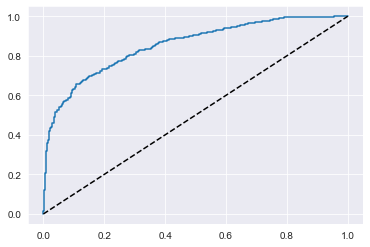

In [43]:
plt.plot(fpr, tpr, label='l1')
plt.plot([0,1], [0,1], 'k--')
plt.show()

Model - l1 analsis... 
Best Score -  0.812125
[[1528   65]
 [ 319   88]]


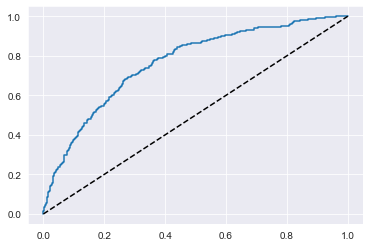

AuRoc Score -  0.7650855786449007
Model - l2 analsis... 
Best Score -  0.812
[[1528   65]
 [ 319   88]]


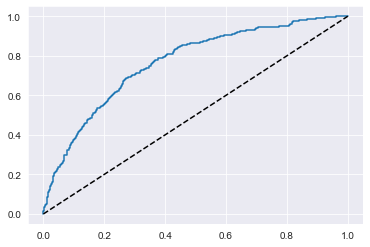

AuRoc Score -  0.7651349346264601
Model - rf analsis... 
Best Score -  0.8622500000000001
[[1534   59]
 [ 207  200]]


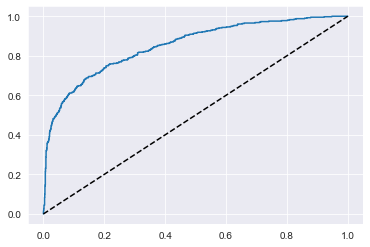

AuRoc Score -  0.8510081730420713
Model - gb analsis... 
Best Score -  0.8644999999999999
[[1532   61]
 [ 202  205]]


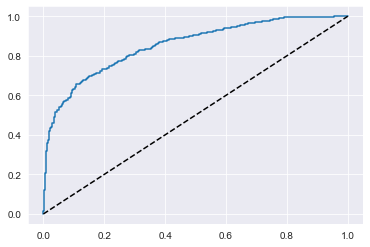

AuRoc Score -  0.8535931925762434


In [46]:
for name, model in fitted_model.items():
    print(f'Model - {name} analsis... ')
    print('Best Score - ', model.best_score_)
    pred_class = model.predict(X_test)
    cm = confusion_matrix(y_test, pred_class)
    print(cm)
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    fpr, tpr, treshold = roc_curve(y_test, pred)
    
    plt.plot(fpr, tpr, label=name)
    plt.plot([0,1], [0,1], 'k--')
    plt.show()
    
    auroc_score = roc_auc_score(y_test, pred)
    print('AuRoc Score - ', auroc_score)

In [48]:
with open('churn_modelling_final_model.pkl', 'wb') as f:
    pickle.dump(fitted_model['gb'].best_estimator_, f)

In [51]:
# winning model
## GB
## Best Score -  0.8644999999999999
## Confusion Metrics [[1532   61]
##                   [ 202  205]]
## AuRoc Score -  0.8535931925762434
## Pipeline(steps=[('standardscaler', StandardScaler()),
##                ('gradientboostingclassifier',
##                GradientBoostingClassifier(n_estimators=200,
##                                            random_state=123))])